In [1]:
import numpy as np
import pandas as pd
import requests
import re
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore")

In [2]:
url="https://www.cars24.com/buy-used-cars-new-delhi/?listingSource=ViewAllCars&storeCityId=2"

In [3]:
response=requests.get(url)

In [4]:
response

<Response [200]>

In [5]:
page=response.text

In [6]:
soup=BeautifulSoup(page)

In [7]:
pname=soup.find("div",attrs={"class":"styles_wrapper__b4UUV"})

In [8]:
pname

<div class="styles_wrapper__b4UUV"><a class="styles_carCardWrapper__sXLIp" href="https://www.cars24.com/buy-used-hyundai-verna-2017-cars-new-delhi-10031004715/" target="_blank"><div class="styles_normalCardWrapper__qDZjq"><div class="sc-eXVaYZ heLbDB"><div class="sc-iRTMaw mKPpq"><div class="sc-eKrodz befrAg"><img alt="Hyundai Verna-img" class="shrinkOnTouch" data-nimg="1" decoding="async" height="120" loading="lazy" src="https://media.cars24.com/hello-ar/dev/transformed/uploads/no_bg/3204bc68-c92a-11f0-bd4e-02ede2007fbe/ebfd7ae5-6cac-4a1c-9b26-da9745cca51d/f0a192d9-e97b-4269-a775-c0c8a4cda634/067411da-7ca1-47ec-9a64-5635ca97cbc1/slot/camera-SRP.png?w=200&amp;format=auto&amp;dpr=2&amp;pad=48,0,0,0&amp;trim-color=auto" style="color:transparent" width="220"/></div><div class="sc-jkvfRO bFlZOv"><div class="styles_outer__ZH1Cg"><button><img alt="Add to wishlist" class="styles_icon__vn_BC shrinkOnTouch" data-nimg="1" decoding="async" height="24" loading="lazy" src="https://assets.cars24.com

In [9]:
url="https://www.cars24.com/buy-used-cars-new-delhi/?listingSource=ViewAllCars&storeCityId=2"
response=requests.get(url)
page=response.text
soup=BeautifulSoup(page)
pname=soup.find("div",attrs={"class":"styles_wrapper__b4UUV"})

productname=[]
for x in soup.find_all('div',attrs={"class":"styles_wrapper__b4UUV"}):
    productname.append(x.text if x else np.nan)

for name in productname:
    print(name)

CARS24 Assured2017 Hyundai Verna 1.6 VTVT SX51.75k kmPetrolManualDL-5CEMI ₹9,829/m*₹5.32L₹5.03 lakh+ other charges Rajouri GardenCARS24 Assured2023 Mahindra Bolero B629.11k kmDieselManualDL-3CEMI ₹12,057/m*₹7.98L₹6.83 lakh+ other charges Metro Walk, Rohini, New DelhiCARS24 Assured2020 Volkswagen Polo TRENDLINE 1.0L33.70k kmPetrolManualDL-8CEMI ₹6,814/m*₹4.39L₹3.86 lakh+ other charges Metro Walk, Rohini, New DelhiCARS24 Assured2019 Hyundai Elite i20 SPORTZ PLUS 1.227.21k kmPetrolManualDL-8CEMI ₹7,714/m*₹4.66L₹4.37 lakh+ other charges Metro Walk, Rohini, New DelhiCARS24 Assured2019 Maruti Swift LXI32.27k kmPetrolManualDL-8CEMI ₹6,643/m*₹3.88L₹3.76 lakh+ other charges Radisson Blu, Sector 13, Dwarka, New DelhiCARS24 Assured2022 Volkswagen VIRTUS COMFORTLINE TSI 1.0 MT47.48k kmPetrolManualDL-7CEMI ₹12,586/m*₹8.69L₹7.13 lakh+ other charges Metro Walk, Rohini, New DelhiCARS24 Assured2021 Hyundai NEW I20 SPORTZ 1.2 MT40.01k kmPetrolManualDL-12EMI ₹9,162/m*₹5.67L₹5.19 lakh+ other charges Radis

In [10]:
cards = soup.find_all("div", class_="styles_wrapper__b4UUV")
print(len(cards))

1


In [11]:
import requests
import time
import pandas as pd

headers = {
    "User-Agent": "Mozilla/5.0",
    "Accept": "application/json"
}

# city name : city_id
cities = {
    "New Delhi": 2,
    "Mumbai": 3,
    "Bangalore": 5
}

base_url = "https://www.cars24.com/buy-used-car/api/v1/search"

data = []
start_time = time.time()

for city, city_id in cities.items():
    print(f"\nFetching {city} cars...")

    for page in range(1, 6):
        url = f"{base_url}?page={page}&listingSource=ViewAllCars&storeCityId={city_id}"

        response = requests.get(url, headers=headers)
        if response.status_code != 200:
            break

        json_data = response.json()
        cars = json_data["data"]["results"]["cars"]

        if not cars:
            break

        for car in cars:
            row = {
                "city": city,
                "year": car.get("modelYear"),
                "brand_model": car.get("carName"),
                "km_driven": car.get("odometerReading"),
                "fuel": car.get("fuelType"),
                "transmission": car.get("transmission"),
                "price": car.get("price"),
                "location": car.get("registrationCityName")
            }
            data.append(row)

        print(f"{city} Page {page} done")
        time.sleep(1)

print("\nTOTAL TIME:", round(time.time() - start_time, 2), "seconds")

df = pd.DataFrame(data)
df.to_csv("cars24_all_cities.csv", index=False)
print("Saved as cars24_all_cities.csv")



Fetching New Delhi cars...

Fetching Mumbai cars...

Fetching Bangalore cars...

TOTAL TIME: 1.92 seconds
Saved as cars24_all_cities.csv


In [12]:
import requests
import time
import re
import numpy as np
from bs4 import BeautifulSoup

# =====================================================
# STEP 1: HEADERS (DO NOT CHANGE)
# =====================================================
headers = {
    "User-Agent": "Mozilla/5.0",
    "Accept-Language": "en-IN,en;q=0.9"
}

# =====================================================
# STEP 2: CITY URLS
# 👉 ADD / MODIFY CITIES HERE
# 👉 storeCityId changes per city
# =====================================================
cities = {
    "New Delhi": {
        "url": "https://www.cars24.com/buy-used-cars-new-delhi/?listingSource=ViewAllCars&storeCityId=2",
        "city_id": 2
    },
    # "Mumbai": {
    #     "url": "https://www.cars24.com/buy-used-cars-mumbai/",
    #     "city_id": 3
    # },
    # "Bangalore": {
    #     "url": "https://www.cars24.com/buy-used-cars-bangalore/",
    #     "city_id": 5
    # }
}

# =====================================================
# STEP 3: EMPTY LISTS (FLIPKART STYLE)
# =====================================================
city_list = []
year_list = []
brand_model_list = []
km_list = []
fuel_list = []
transmission_list = []
emi_list = []
price_list = []
final_price_list = []
location_list = []
page_no_list = []

total_time = time.time()

# =====================================================
# STEP 4: MAIN LOOP (CITY → PAGE → CARD)
# =====================================================
for city, info in cities.items():

    base_url = info["url"]
    city_id = info["city_id"]

    # 👉 CHANGE PAGE RANGE HERE
    for page in range(1, 6):

        start_time = time.time()

        url = f"{base_url}?page={page}&listingSource=ViewAllCars&storeCityId={city_id}"
        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")

        # =================================================
        # STEP 5: PARENT CARD CLASS
        # 👉 VERIFY THIS CLASS IN INSPECT
        # =================================================
        cards = soup.find_all("div", class_="styles_carCardWrapper__sXLp")

        if not cards:
            break

        for card in cards:
            try:
                # =============================================
                # TITLE → YEAR + BRAND + MODEL
                # 👉 CLASS FOR TITLE
                # =============================================
                title = card.find("div", class_="styles_wrapper__b4UUV").text.strip()
                parts = title.split(" ", 2)

                year = parts[0]
                brand_model = parts[1] + " " + parts[2]

                # =============================================
                # SPECS → KM, FUEL, TRANSMISSION
                # =============================================
                specs = card.find_all("li")

                km = specs[0].text.replace("k km", "").strip()
                fuel = specs[1].text.strip()
                transmission = specs[2].text.strip()

                # =============================================
                # EMI (TEXT CONTAINS "EMI")
                # =============================================
                emi_text = card.find("div", string=re.compile("EMI"))
                emi = re.sub(r"[^\d]", "", emi_text.text) if emi_text else np.nan

                # =============================================
                # DISPLAY PRICE
                # 👉 PRICE CLASS
                # =============================================
                price_div = card.find("div", class_="styles_price__1Yx0r")
                price = price_div.text if price_div else np.nan

                # =============================================
                # FINAL PRICE (lakh)
                # =============================================
                final_price_match = re.search(r"₹\s*\d+\.?\d*\s*lakh", card.text)
                final_price = final_price_match.group() if final_price_match else np.nan

                # =============================================
                # LOCATION
                # 👉 LOCATION CLASS
                # =============================================
                location_div = card.find("div", class_="styles_location__2JZr_")
                location = location_div.text.strip() if location_div else np.nan

                # =============================================
                # APPEND DATA (ONE CARD = ONE ROW)
                # =============================================
                city_list.append(city)
                year_list.append(year)
                brand_model_list.append(brand_model)
                km_list.append(km)
                fuel_list.append(fuel)
                transmission_list.append(transmission)
                emi_list.append(emi)
                price_list.append(price)
                final_price_list.append(final_price)
                location_list.append(location)
                page_no_list.append(page)

            except:
                continue

        print(f"{city} | Page {page} done in {time.time() - start_time:.2f}s")

print("TOTAL TIME:", time.time() - total_time)

# =====================================================
# DATA IS NOW STORED IN LISTS
# USE city_list, price_list, etc. FOR ANALYSIS
# =====================================================


TOTAL TIME: 0.5785999298095703


In [1]:
import requests
import time
import re
import numpy as np
from bs4 import BeautifulSoup

# --------------------------------------------------
# HEADERS (DO NOT CHANGE)
# --------------------------------------------------
headers = {
    "User-Agent": "Mozilla/5.0",
    "Accept-Language": "en-IN,en;q=0.9"
}

# --------------------------------------------------
# CITIES (URL ONLY)
# ADD / REMOVE CITIES IF YOU WANT MORE
# --------------------------------------------------
cities = {
    "New Delhi": "https://www.cars24.com/buy-used-cars-new-delhi/",
    "Mumbai": "https://www.cars24.com/buy-used-cars-mumbai/",
    "Bangalore": "https://www.cars24.com/buy-used-cars-bangalore/",
    "Hyderabad": "https://www.cars24.com/buy-used-cars-hyderabad/",
    "Chennai": "https://www.cars24.com/buy-used-cars-chennai/",
    "Pune": "https://www.cars24.com/buy-used-cars-pune/",
    "Kolkata": "https://www.cars24.com/buy-used-cars-kolkata/",
    "Ahmedabad": "https://www.cars24.com/buy-used-cars-ahmedabad/",
    "Jaipur": "https://www.cars24.com/buy-used-cars-jaipur/",
    "Chandigarh": "https://www.cars24.com/buy-used-cars-chandigarh/",
    "Indore": "https://www.cars24.com/buy-used-cars-indore/",
    "Bhopal": "https://www.cars24.com/buy-used-cars-bhopal/"
}


# --------------------------------------------------
# EMPTY LISTS (FLIPKART STYLE STORAGE)
# --------------------------------------------------
city_list = []
car_url_list = []
year_list = []
brand_list = []
model_list = []
variant_list = []
km_list = []
fuel_list = []
transmission_list = []
reg_no_list = []
emi_list = []
price_list = []
final_price_list = []
location_list = []
page_list = []

start_total = time.time()

# --------------------------------------------------
# MAIN LOOP : CITY → PAGE → CARD
# --------------------------------------------------
for city, base_url in cities.items():

    print(f"\nScraping city: {city}")

    # 15 pages per city → HIGH ROW COUNT
    for page in range(1, 16):

        page_start = time.time()
        url = f"{base_url}?page={page}"

        response = requests.get(url, headers=headers)
        soup = BeautifulSoup(response.text, "html.parser")

        # --------------------------------------------------
        # PARENT CARD (FROM YOUR PROVIDED HTML)
        # --------------------------------------------------
        cards = soup.find_all("a", class_="styles_carCardWrapper__sXLIp")

        if not cards:
            break

        for card in cards:
            try:
                # ---------------- CAR URL ----------------
                car_url = card.get("href")

                # ---------------- TITLE ----------------
                title_tag = card.find("span", class_="jtaHBC")
                if not title_tag:
                    continue

                title_text = title_tag.text.strip()
                parts = title_text.split(" ", 2)

                year = parts[0]
                brand = parts[1]
                model = parts[2] if len(parts) > 2 else np.nan

                # ---------------- VARIANT ----------------
                variant_tag = card.find("span", class_="kTVtGZ")
                variant = variant_tag.text.strip() if variant_tag else np.nan

                # ---------------- SPECS ----------------
                specs = card.find_all("p", class_="eTYSzW")

                km = specs[0].text if len(specs) > 0 else np.nan
                fuel = specs[1].text if len(specs) > 1 else np.nan
                transmission = specs[2].text if len(specs) > 2 else np.nan
                reg_no = specs[3].text if len(specs) > 3 else np.nan

                # ---------------- EMI ----------------
                emi_tag = card.find("p", string=lambda x: x and "EMI" in x)
                emi = re.sub(r"[^\d]", "", emi_tag.text) if emi_tag else np.nan

                # ---------------- PRICE ----------------
                price_tag = card.find("p", class_="gwfaqr")
                price = price_tag.text if price_tag else np.nan

                final_price_tag = card.find("p", class_="bdSJhg")
                final_price = final_price_tag.text if final_price_tag else np.nan

                # ---------------- LOCATION ----------------
                location_tag = card.find("div", class_="styles_ellipsis__uatjG")
                location = location_tag.text.strip() if location_tag else np.nan

                # ---------------- APPEND (FLIPKART STYLE) ----------------
                city_list.append(city)
                car_url_list.append(car_url)
                year_list.append(year)
                brand_list.append(brand)
                model_list.append(model)
                variant_list.append(variant)
                km_list.append(km)
                fuel_list.append(fuel)
                transmission_list.append(transmission)
                reg_no_list.append(reg_no)
                emi_list.append(emi)
                price_list.append(price)
                final_price_list.append(final_price)
                location_list.append(location)
                page_list.append(page)

            except:
                continue

        print(f"{city} | Page {page} done in {round(time.time() - page_start, 2)} sec")

        time.sleep(1)   # IMPORTANT: avoid blocking

print("\nTOTAL ROWS COLLECTED:", len(city_list))
print("TOTAL TIME:", round(time.time() - start_total, 2), "seconds")



Scraping city: New Delhi
New Delhi | Page 1 done in 1.77 sec
New Delhi | Page 2 done in 0.99 sec
New Delhi | Page 3 done in 0.94 sec
New Delhi | Page 4 done in 0.7 sec
New Delhi | Page 5 done in 0.81 sec
New Delhi | Page 6 done in 0.73 sec
New Delhi | Page 7 done in 0.84 sec
New Delhi | Page 8 done in 0.54 sec
New Delhi | Page 9 done in 0.65 sec
New Delhi | Page 10 done in 0.59 sec
New Delhi | Page 11 done in 0.79 sec
New Delhi | Page 12 done in 2.21 sec
New Delhi | Page 13 done in 0.76 sec
New Delhi | Page 14 done in 0.88 sec
New Delhi | Page 15 done in 1.25 sec

Scraping city: Mumbai
Mumbai | Page 1 done in 0.47 sec
Mumbai | Page 2 done in 0.86 sec
Mumbai | Page 3 done in 1.01 sec
Mumbai | Page 4 done in 0.89 sec
Mumbai | Page 5 done in 0.99 sec
Mumbai | Page 6 done in 0.9 sec
Mumbai | Page 7 done in 0.59 sec
Mumbai | Page 8 done in 1.88 sec
Mumbai | Page 9 done in 0.6 sec
Mumbai | Page 10 done in 0.8 sec
Mumbai | Page 11 done in 0.75 sec
Mumbai | Page 12 done in 0.71 sec
Mumbai | P

In [4]:
import pandas as pd

# ------------------------------------
# CREATE DATAFRAME (COLUMN = LIST)
# ------------------------------------
df = pd.DataFrame({
    "city": city_list,
    "year": year_list,
    "brand": brand_list,
    "model": model_list,
    "variant": variant_list,
    "km_driven": km_list,
    "fuel_type": fuel_list,
    "transmission": transmission_list,
    "registration_no": reg_no_list,
    "emi": emi_list,
    "price": price_list,
    "final_price": final_price_list,
    "location": location_list,
    "page_no": page_list
})

# ------------------------------------
# QUICK CHECK
# ------------------------------------
df

,city,year,brand,model,variant,km_driven,fuel_type,transmission,registration_no,emi,price,final_price,location,page_no


In [5]:
df=df.drop("page_no",axis=1)

In [6]:
df.head()

,city,year,brand,model,variant,km_driven,fuel_type,transmission,registration_no,emi,price,final_price,location


In [7]:
df.shape

(0, 13)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2660 entries, 0 to 2659
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   city             2660 non-null   object
 1   year             2660 non-null   object
 2   brand            2660 non-null   object
 3   model            2660 non-null   object
 4   variant          2660 non-null   object
 5   km_driven        2660 non-null   object
 6   fuel_type        2660 non-null   object
 7   transmission     2660 non-null   object
 8   registration_no  2660 non-null   object
 9   emi              2660 non-null   object
 10  price            945 non-null    object
 11  final_price      2660 non-null   object
 12  location         2660 non-null   object
dtypes: object(13)
memory usage: 270.3+ KB


In [115]:
df.isnull().sum()

city                  0
year                  0
brand                 0
model                 0
variant               0
km_driven             0
fuel_type             0
transmission          0
registration_no       0
emi                   0
price              1715
final_price           0
location              0
dtype: int64

In [116]:
df['price']=df["price"].apply(lambda x:float(re.sub(r"[₹,L]","",str(x))))

In [117]:
df["price"].fillna(df["price"].median(),inplace=True)

In [118]:
df["final_price"]=df["final_price"].apply(lambda x:float(re.sub(r"[₹,lakh]","",str(x))))

In [119]:
df["year"]=df["year"].astype(int)

In [120]:
df["emi"].isnull().sum()

np.int64(0)

In [121]:
df["emi"] = pd.to_numeric(df["emi"], errors="coerce")

In [122]:
df["Location"]=df["location"].apply(lambda x:re.findall(r"[^,]+$",x)[0])

In [128]:
df['km_driven']=df["km_driven"].apply(lambda x:float(re.sub(r"[^\d.]","",str(x)))*1000)

In [124]:
df=df.drop("location",axis=1)

In [125]:
df["emi"]=df["emi"].fillna(df["emi"].median())

In [126]:
df=df.drop("Location",axis=1)

In [129]:
df.head()

,city,year,brand,model,variant,km_driven,fuel_type,transmission,registration_no,emi,price,final_price
0,New Delhi,2017,Hyundai,Verna,1.6 VTVT SX,517500.0,Petrol,Manual,DL-5C,9829.0,5.32,5.03
1,New Delhi,2023,Mahindra,Bolero,B6,291100.0,Diesel,Manual,DL-3C,12057.0,7.98,6.83
2,New Delhi,2020,Volkswagen,Polo,TRENDLINE 1.0L,337000.0,Petrol,Manual,DL-8C,6814.0,4.39,3.86
3,New Delhi,2019,Hyundai,Elite i20,SPORTZ PLUS 1.2,272100.0,Petrol,Manual,DL-8C,7714.0,4.66,4.37
4,New Delhi,2019,Maruti,Swift,LXI,322700.0,Petrol,Manual,DL-8C,6643.0,3.88,3.76


In [130]:
df.to_csv("Cleaned_cars",index=False)

In [2]:
df=pd.read_csv("Cleaned_cars")

NameError: name 'pd' is not defined

In [132]:
df.shape

(2660, 12)

In [133]:
df.isnull().sum()

city               0
year               0
brand              0
model              0
variant            0
km_driven          0
fuel_type          0
transmission       0
registration_no    0
emi                0
price              0
final_price        0
dtype: int64

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

**Univariate anlaysis**

<Axes: xlabel='city'>

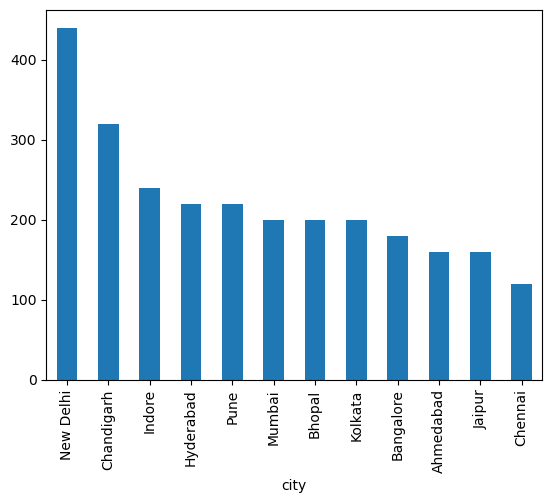

In [135]:
df["city"].value_counts().plot(kind="bar")

In [136]:
df["brand"].value_counts()

brand
Maruti        787
Hyundai       514
Tata          350
Honda         208
Renault       184
Volkswagen    142
Mahindra       86
Toyota         68
Ford           64
Skoda          57
KIA            43
Datsun         39
Nissan         38
Jeep           36
Chevrolet      34
Jaguar         10
Name: count, dtype: int64

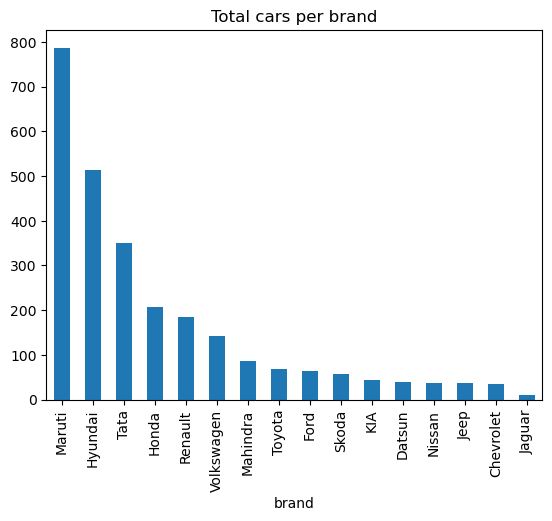

In [137]:
df["brand"].value_counts().plot(kind="bar")
plt.title("Total cars per brand")
plt.show()

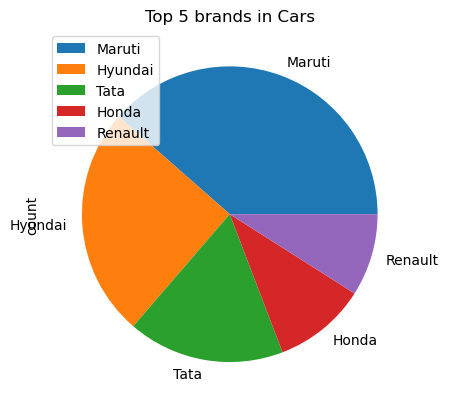

In [138]:
df["brand"].value_counts().head(5).plot(kind="pie")
plt.title("Top 5 brands in Cars")
plt.legend(loc="upper left")
plt.show()

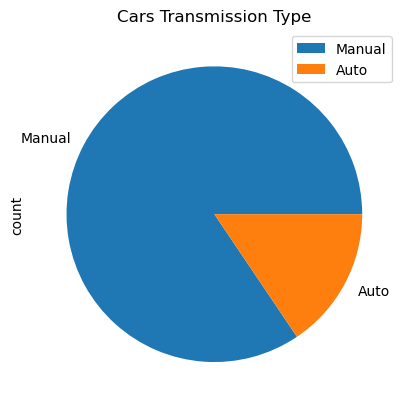

In [139]:
df["transmission"].value_counts().plot(kind="pie")
plt.title("Cars Transmission Type")
plt.legend()
plt.show()

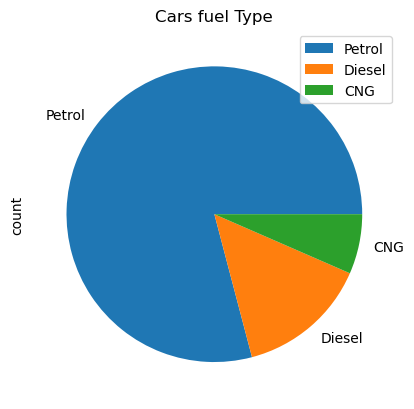

In [140]:
df["fuel_type"].value_counts().plot(kind="pie")
plt.title("Cars fuel Type")
plt.legend()
plt.show()

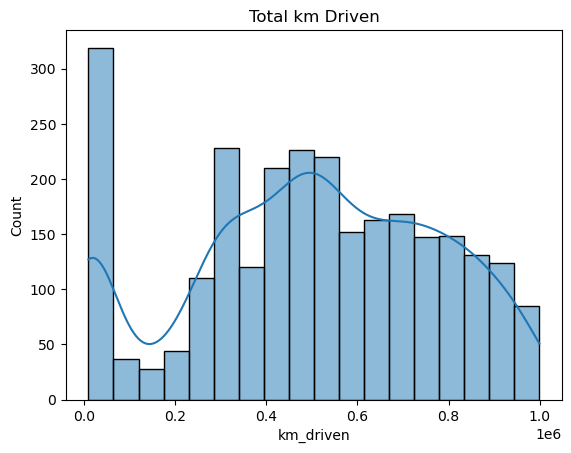

In [143]:
sns.histplot(x=df["km_driven"],kde=True)
plt.title("Total km Driven")
plt.show()

<Axes: ylabel='km_driven'>

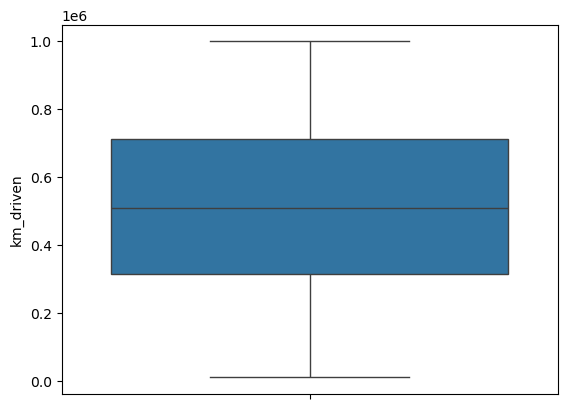

In [142]:
sns.boxplot(df["km_driven"])

**INSIGHTS From THE UNIVARIATE Analysis**

In [45]:
# New delhi was the city which was selling most number of used cars**

In [46]:
# top 5 cities are selling more than the 150 cars.

In [47]:
# maruti cars are most selling cars from the list in the used cars with 545,next hyundai and tata takes place.

In [48]:
# petrol cars are dominating the market among the all other various fuel type more than the diesel type.
# diesel cars are second most selling cars according to the data.
# petrol cars occupies more than the 75% market in the used cars market.
# diesel cars are the next most selling cars.

In [49]:
# manual cars are dominating the market than the auto gear cars.
# manual cars occupies more than the 65% percent share in the used cars selling market than the auto cars.

In [50]:
# From the list most of the cars are driven between 35000 to 75000. the mid value from the data was 50000.we dont have any outliers.

**BI-Variate Analysis**

In [144]:
df.head()

,city,year,brand,model,variant,km_driven,fuel_type,transmission,registration_no,emi,price,final_price
0,New Delhi,2017,Hyundai,Verna,1.6 VTVT SX,517500.0,Petrol,Manual,DL-5C,9829.0,5.32,5.03
1,New Delhi,2023,Mahindra,Bolero,B6,291100.0,Diesel,Manual,DL-3C,12057.0,7.98,6.83
2,New Delhi,2020,Volkswagen,Polo,TRENDLINE 1.0L,337000.0,Petrol,Manual,DL-8C,6814.0,4.39,3.86
3,New Delhi,2019,Hyundai,Elite i20,SPORTZ PLUS 1.2,272100.0,Petrol,Manual,DL-8C,7714.0,4.66,4.37
4,New Delhi,2019,Maruti,Swift,LXI,322700.0,Petrol,Manual,DL-8C,6643.0,3.88,3.76


Text(0.5, 1.0, 'City wise prices')

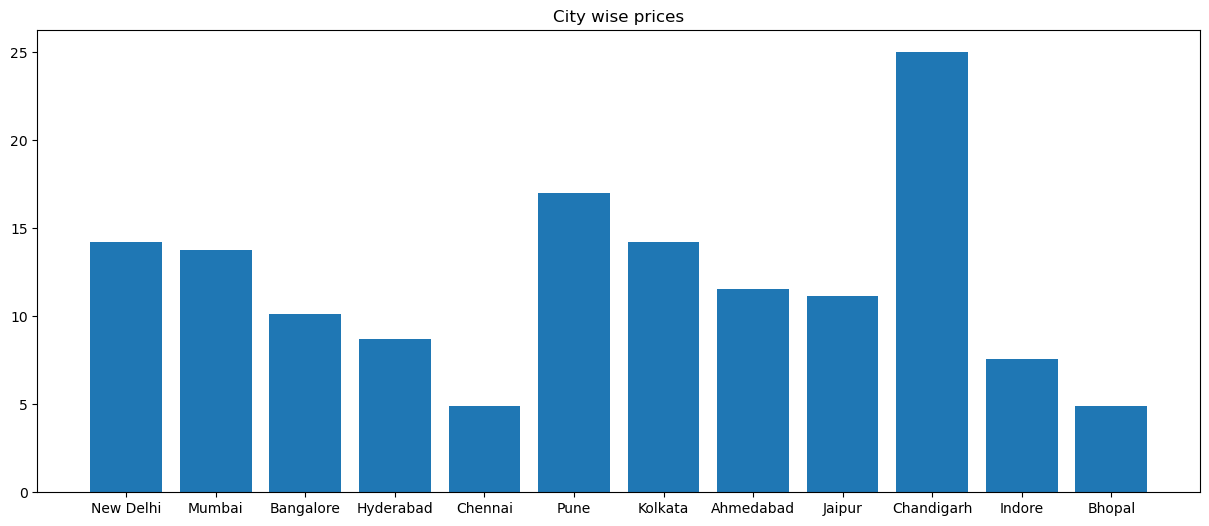

In [145]:
plt.figure(figsize=(15,6))
plt.bar(df["city"],df["price"])
plt.title("City wise prices")

<Axes: xlabel='city', ylabel='price'>

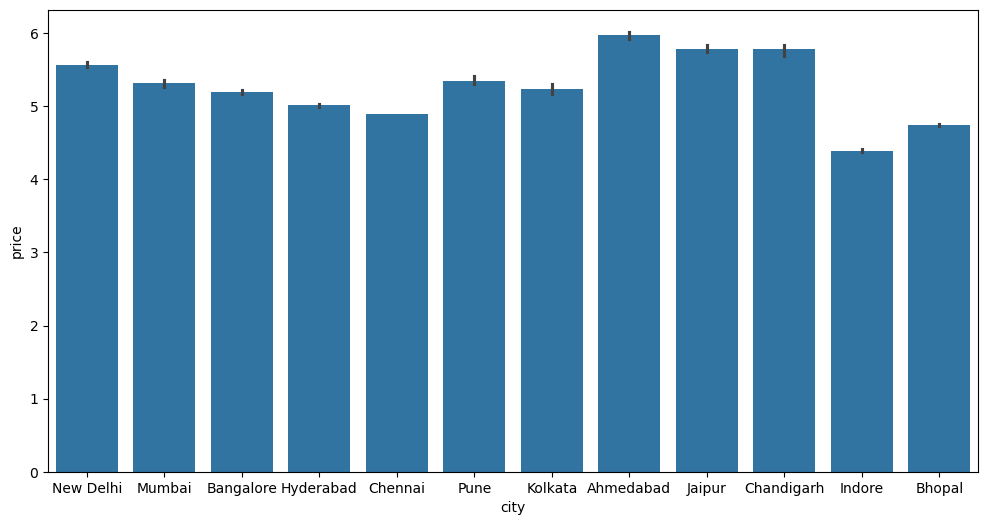

In [146]:
plt.figure(figsize=(12,6))
sns.barplot(
    x="city",
    y="price",
    data=df,
    ci=25,
    estimator=np.mean
)

<Axes: xlabel='year', ylabel='price'>

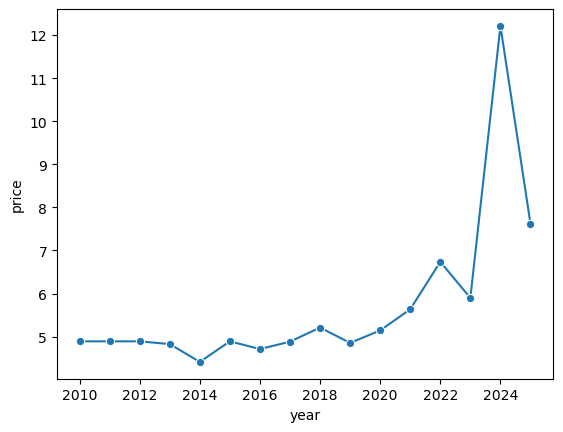

In [147]:

sns.lineplot(
    x="year",
    y="price",
    data=df,
    marker="o",
    ci=None
)

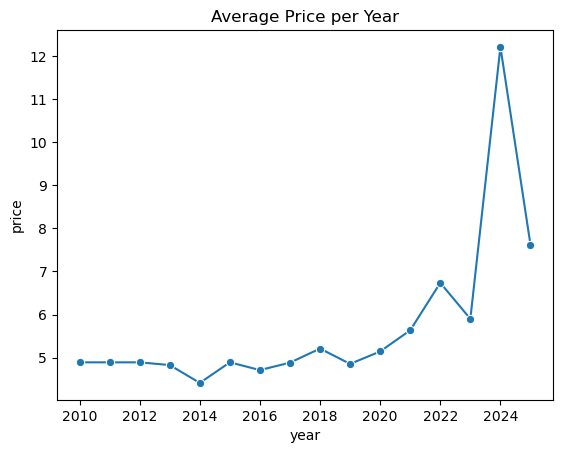

In [177]:
year_price=df.groupby("year")["price"].mean().reset_index()
sns.lineplot(
    x="year",
    y="price",
    data=year_price,
    marker="o"
)
plt.title("Average Price per Year")
plt.show()

<Axes: xlabel='year', ylabel='price'>

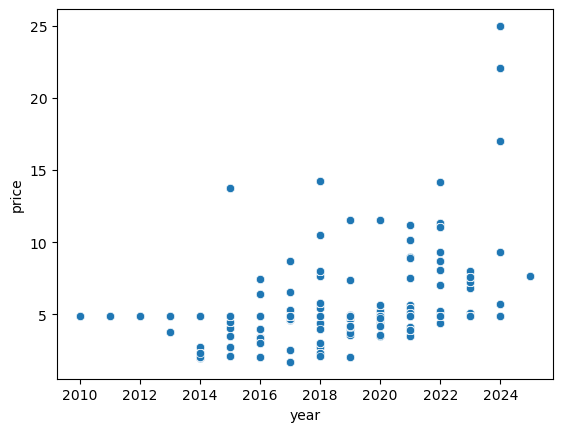

In [148]:
sns.scatterplot(
    x="year",
    y="price",
    data=df,
    marker="o"
)

Text(0, 0.5, 'Final_Price')

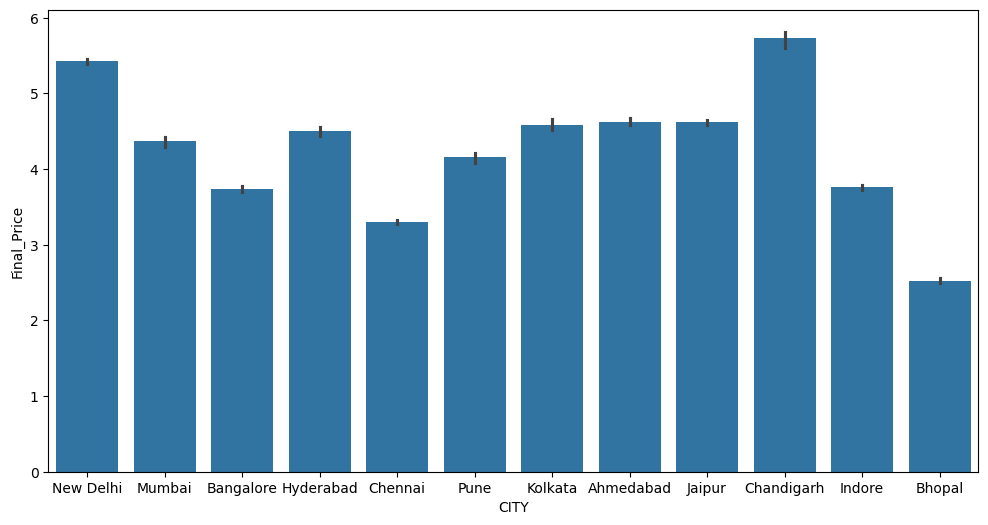

In [149]:
plt.figure(figsize=(12,6))
sns.barplot(
    x="city",
    y="final_price",
    data=df,
    ci=25,
    estimator=np.mean
)
plt.xlabel("CITY")
plt.ylabel("Final_Price")

<BarContainer object of 2660 artists>

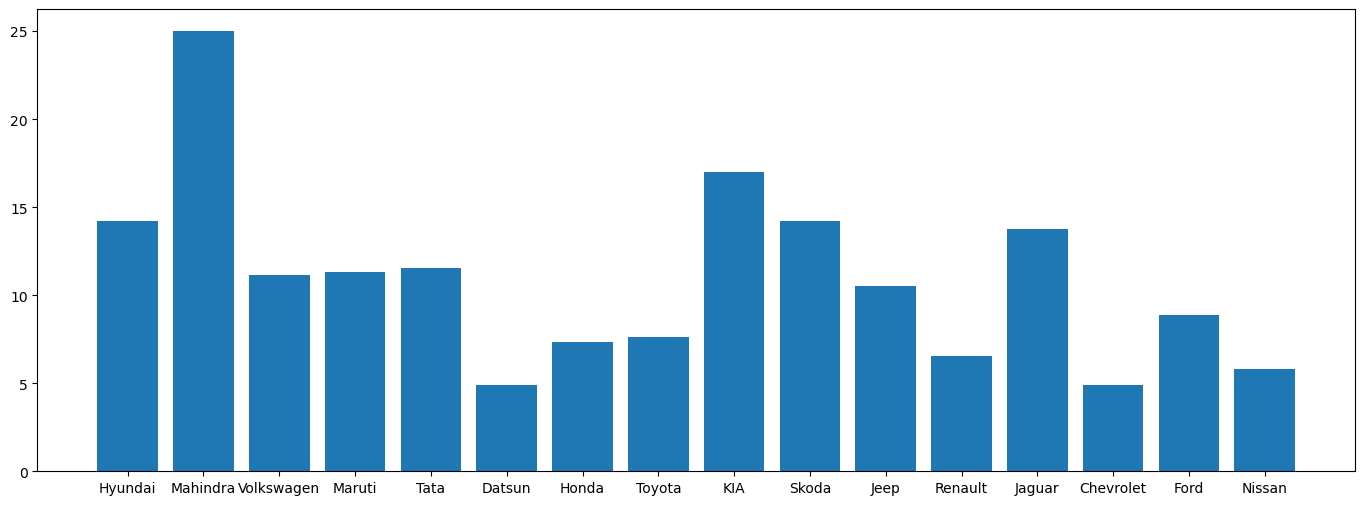

In [150]:
plt.figure(figsize=(17,6))
plt.bar(df["brand"],df["price"])

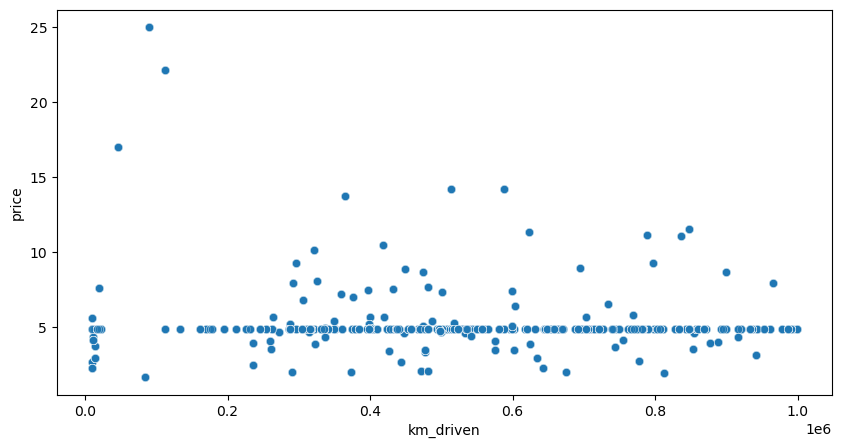

In [151]:
plt.figure(figsize=(10,5))
sns.scatterplot(
    x="km_driven",
    y="price",
    alpha=0.5,
    data=df
)
plt.show()

<Axes: xlabel='fuel_type', ylabel='price'>

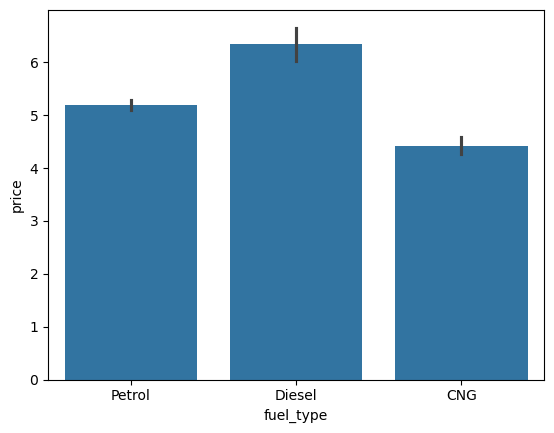

In [152]:
sns.barplot(
    x="fuel_type",
    y="price",
    data=df
)

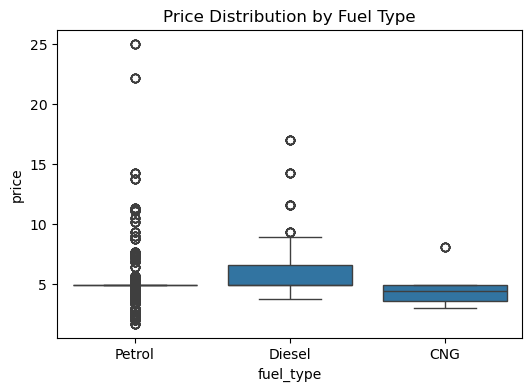

In [153]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="fuel_type", y="price")
plt.title("Price Distribution by Fuel Type")
plt.show()

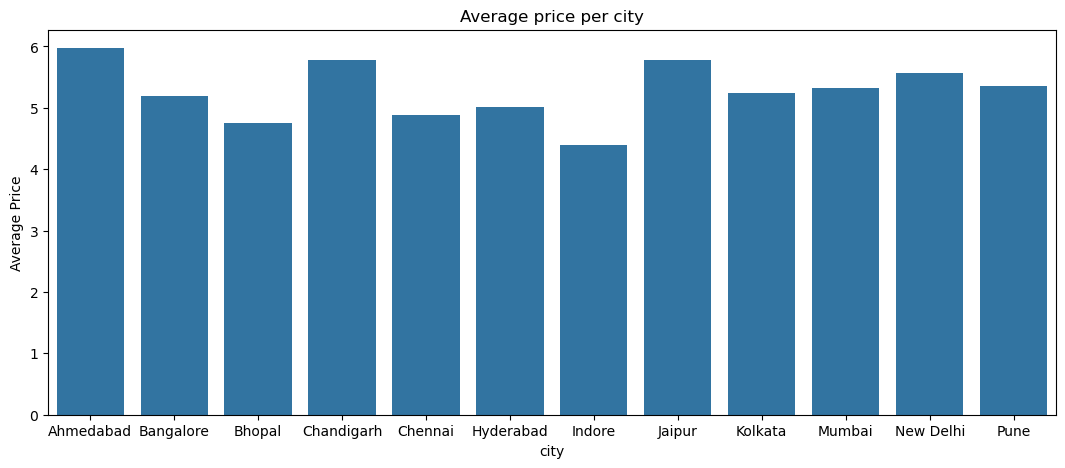

In [155]:
plt.figure(figsize=(13,5))
city_price=df.groupby("city")["price"].mean().reset_index()
sns.barplot(
    x="city",
    y="price",
    data=city_price
)
plt.title("Average price per city")
plt.ylabel("Average Price")
plt.show()

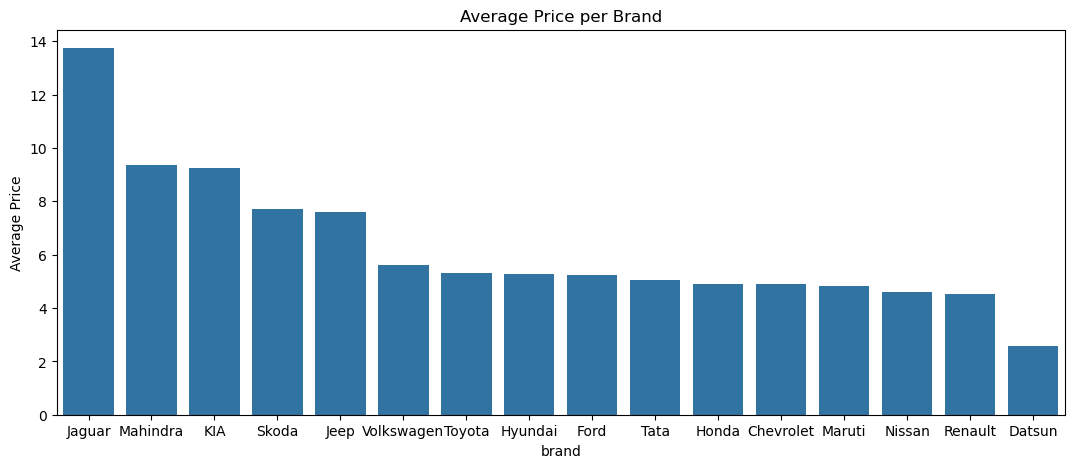

In [156]:
Brand_price=df.groupby("brand")["price"].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(13,5))
sns.barplot(
    x="brand",
    y="price",
    data=Brand_price
)
plt.ylabel("Average Price")
plt.title("Average Price per Brand")
plt.show()

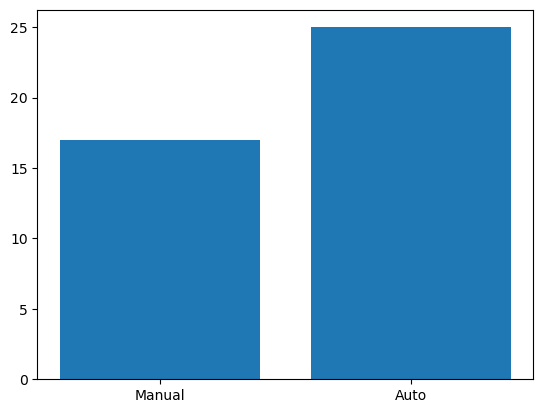

In [157]:
plt.bar(df["transmission"],df["price"])
plt.show()

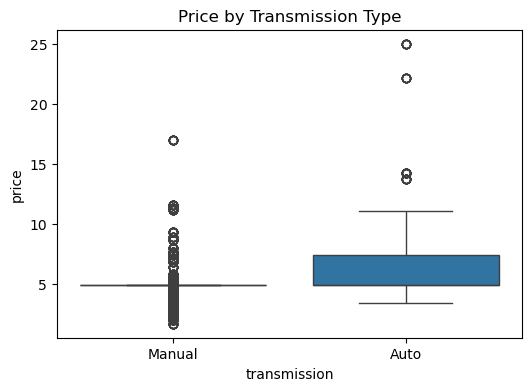

In [158]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="transmission", y="price")
plt.title("Price by Transmission Type")
plt.show()

**BI-Variate Analysis Insights**

In [ ]:
# From the chandigarh the prices are very high and the next the new delhi has the highest price.
# most the cities have the average price more than the 5 lakhs

In [ ]:
# from the 2010-2018 the average car prices are at the 5 lakhs only.
# But after the 2018 and mainly 2019 on wards the average used car prices are increasing.
# From 2023 to 2024 the average car prices are increased from 5.5 lakhs to the 12 lakhs.But in the 2025 it decreased to the 7.5 lakhs.
# From the average final price and the price analysis the chandigarh has more avg price than all cities.

In [ ]:
# mostly from the metropolian cities the avg final price for the cars are more 4 lakhs.

In [ ]:
# In the brands the mahindra,kia and jaguar are the top brands which costs more than the 15 lakhs.

In [ ]:
# cars which are high price more than 15 lakhs are mostly travelled below the 20k km.
# cars which are more than the 10 lakhs are travelled more than the 30k to 50 k.
# the cars price which price was between 5 lakhs to 10 lakhs are travelled 20k to 60k.
# the cars prices are mostly in the 5 lakhs only .But in this cars are all are travelled more than 20k to 100k.
# there no cars between the below 10k with price 5 lakhs.

In [ ]:
# Diesel cars are occupies the whole market and the next the petrol cars are occupied.
# In the Petrol cars most number of cars are in the below the 5 lakhs and mostly below 15 lakhs.
# in the Diesel cars are the more than half of the cars are in the 5 lakhs range only.
# Remaining also below the 10 lakhs only.
# cng cars are below 5 lakhs only.

In [ ]:
# IN the Petrol cars the outliers are there.

In [ ]:
# Most of the cities are average price was more than the 5 lakhs.
# From the brand the jaguar was more price to buy
# mahindra,kia was 8 lakhs and the skoda,jeep are 6.5 lakhs.

In [ ]:
# In the MArket the Auto gear cars are more price than the manual cars.
# In the marktet it manual cars are occupied more than 75 % of share.

In [ ]:
# Manual cars are mostly below the 5 lakhs only and manuals cars price was not exceeded the 10 lkahs price.
# In the Auto cars it has the outliers which there price was 20-25 lakhs.
# In the Auto cars,most of the cars price was in between 5 lakhs to 7.5 lakhs only.some are only exceeding 12.5 lakhs to 15 lakhs.

In [159]:
df.head()

,city,year,brand,model,variant,km_driven,fuel_type,transmission,registration_no,emi,price,final_price
0,New Delhi,2017,Hyundai,Verna,1.6 VTVT SX,517500.0,Petrol,Manual,DL-5C,9829.0,5.32,5.03
1,New Delhi,2023,Mahindra,Bolero,B6,291100.0,Diesel,Manual,DL-3C,12057.0,7.98,6.83
2,New Delhi,2020,Volkswagen,Polo,TRENDLINE 1.0L,337000.0,Petrol,Manual,DL-8C,6814.0,4.39,3.86
3,New Delhi,2019,Hyundai,Elite i20,SPORTZ PLUS 1.2,272100.0,Petrol,Manual,DL-8C,7714.0,4.66,4.37
4,New Delhi,2019,Maruti,Swift,LXI,322700.0,Petrol,Manual,DL-8C,6643.0,3.88,3.76


**MULTI VARIATE ANALYSIS**

Text(0.5, 1.0, 'Price Vs Km_Driven with fuel type Analysis')

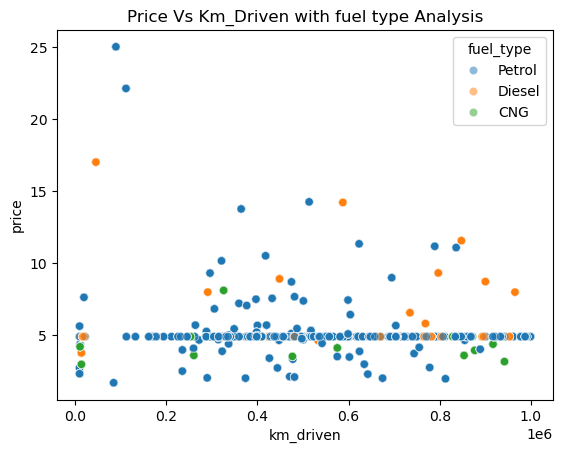

In [162]:
sns.scatterplot(
    data=df,
    x="km_driven",
    y="price",
    hue="fuel_type",
    alpha=0.5
)
plt.title("Price Vs Km_Driven with fuel type Analysis")

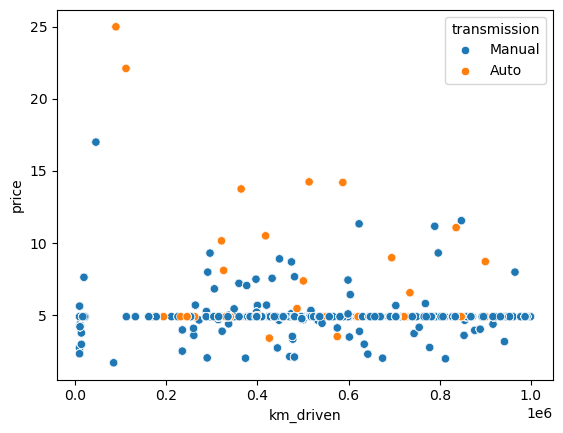

In [164]:
sns.scatterplot(
    x="km_driven",
    y="price",
    hue="transmission",
    data=df
)
plt.show()

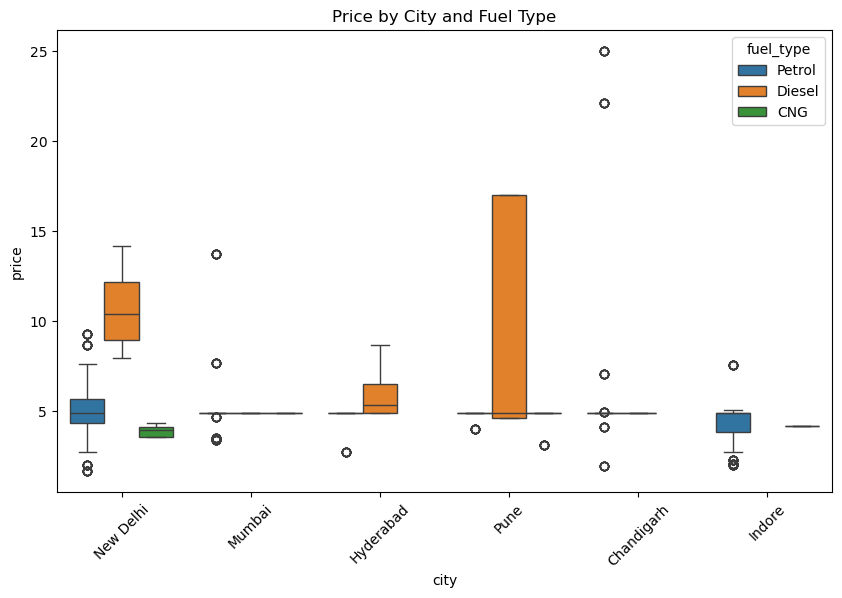

In [167]:
top_cities = df["city"].value_counts().head(6).index

plt.figure(figsize=(10,6))
sns.boxplot(
    data=df[df["city"].isin(top_cities)],
    x="city",
    y="price",
    hue="fuel_type"
)
plt.title("Price by City and Fuel Type")
plt.xticks(rotation=45)
plt.show()


**Heat Map**

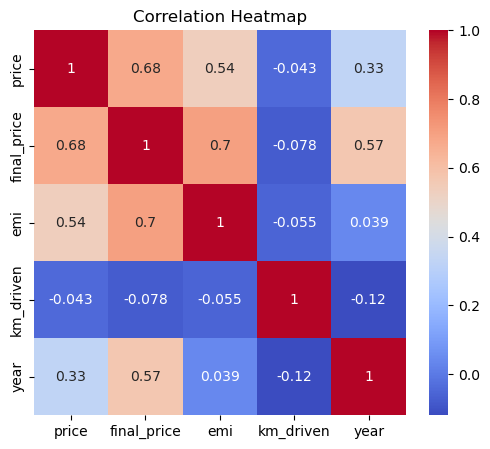

In [174]:
num_cols = ["price", "final_price", "emi", "km_driven", "year"]

plt.figure(figsize=(6,5))
sns.heatmap(
    df[num_cols].corr(),
    annot=True,
    cmap="coolwarm"
)
plt.title("Correlation Heatmap")
plt.show()

**INsights**

In [ ]:
# Petrol cars are mostly at the 5 lakhs price only.
# Petrol cars are travelled 20k to 80k mostly.
# most number of cng cars travelled more than 70k and in between 70k and 90k.
# there only petrol cars and the diesel cars more than 10 lakhs price.
# there are very few cars of dielsel,cng are travelled below 100 km.these are look like a new cars orany other faults will be there.

In [178]:
# majorly manual cars are below the 5 lakhs only.
# most of the annual cars are between 5 lakhs to 15 lakhs.
# most of the auto cars are travelled lass than 60k km.
# auto cars are travelled between the 10 k to 60k km.

In [ ]:
# From the new delhi ,more than the 50% diesel cars price are more than 8 lakhs.
# But the petrol cars are between 4 lakhs to 6.5 lakhs.
# In the cng cars are less than the 4 lakhs only.

In [ ]:
# In the mumbai ,the data was very less and in that data some cars are less than the 5 lakhs only.some are only upto 15 lakhs.
# In the hyderabad mostly the diesel cars are mostly more than the 5 lakhs and very less petrol,cng cars are there.
# In the cities mostly more number of diesel cars are from the pune and the price in between the 5 lakhs to 17.5 lakhs.
# In the chandigarh also all the cng,diesel,petrol cars are almost same and very less.it has the outliers more than the 20 lakhs.
# In the indore petrol cars are more and they are mostly below the 5 lakhs only.diesel cars are very low and its prices are 5 lakhs only.

In [ ]:
# Price VS emi 
# the value was 0.54,if the price was increases the emi increases.
# price Vs Final_price
# the prices are strongly related to the final_price.
# price vs km_driven
# the value was -0.043,so there no such linear relationship between the price and the km_driven

In [ ]:
# price vs year 
# value was 0.33.
# final Price vs emi
# the value was 0.7 there is a strong linear relationship between the final price and the emi.
# if the final price increases the emi also increases.

In [ ]:
# year vs final_price 
# value is 0.57 . year and the final_price has the srong relation. if the manfucature year increases the final price 
# also increases ,but not perfectly

In [ ]:
# There is no relationship between any km_driven with any thing.
# but it have very low reverse realtionship between the km_driven and the year.
# if the year increases,the km driven moderately increases.